# Prediction of the value of a car based on its characteristics

## Data extraction

The first step of this project was to extract data from the web through the [Scrapy](https://docs.scrapy.org/en/latest/index.html) Framework. The data used were extracted from the [Creditas Auto](https://auto.creditas.com/catalogo) website, which is a website where you can buy semi-used cars.

The script referring to the extraction of data from the Creditas Auto website can be found here *code_for_data_extraction*.

## Data preparation and data cleaning

In [1]:
import pandas as pd

In [2]:
cars_df = pd.read_csv("code_for_data_extraction/cars_infos_creditas.csv", encoding="utf-8")

In [3]:
cars_df.head()

,car_description,car_name,km_traveled,value,year
0,1.6 16v Advance Xtronic,Nissan Versa,6.214,R$ 107.870,2022
1,2.0 Lx 4x2 16v Automático,Honda Crv,102.064,R$ 76.870,2012
2,1.8 Gli 16v Automático,Toyota Corolla,35.990,R$ 101.970,2019
3,1.6 Freestyle 16v Powershift,Ford Ecosport,51.683,R$ 71.870,2017
4,1.6 16v Flexstart S Xtronic,Nissan Kicks,41.417,R$ 86.970,2018


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_description  1801 non-null   object 
 1   car_name         1801 non-null   object 
 2   km_traveled      1801 non-null   float64
 3   value            1801 non-null   object 
 4   year             1801 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 70.5+ KB


In [5]:
columns = ["car_description", "car_name"]
for col in columns:
    cars_df[col] = cars_df[col].str.replace(" ", "_")\
                    .str.lower()\
                    .str.normalize('NFKD')\
                    .str.encode('ascii', errors='ignore')\
                    .str.decode('utf-8')
    
cars_df.head()

,car_description,car_name,km_traveled,value,year
0,1.6_16v_advance_xtronic,nissan_versa,6.214,R$ 107.870,2022
1,2.0_lx_4x2_16v_automatico,honda_crv,102.064,R$ 76.870,2012
2,1.8_gli_16v_automatico,toyota_corolla,35.990,R$ 101.970,2019
3,1.6_freestyle_16v_powershift,ford_ecosport,51.683,R$ 71.870,2017
4,1.6_16v_flexstart_s_xtronic,nissan_kicks,41.417,R$ 86.970,2018


In [6]:
cars_df["value"][0]

'R$\xa0107.870'

In [7]:
cars_df["value"] = cars_df["value"].str.replace(u'\xa0', u'', regex=True)

In [8]:
cars_df["value"][0]

'R$107.870'

In [9]:
cars_df["value"] = cars_df["value"].str.replace('R$', '', regex=False)

In [10]:
cars_df["value"][0]

'107.870'

In [11]:
cars_df["value"] = cars_df["value"].astype('float64')

In [12]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_description  1801 non-null   object 
 1   car_name         1801 non-null   object 
 2   km_traveled      1801 non-null   float64
 3   value            1801 non-null   float64
 4   year             1801 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 70.5+ KB


In [13]:
cars_df["car_name"] = cars_df["car_name"].astype("category")
cars_df["car_description"] = cars_df["car_description"].astype("category")

In [14]:
# note: I will keep the "year" feature as "category" because I believe
# that newer cars are more expensive
cars_df["year"] = cars_df["year"].astype("category")

In [15]:
cars_df["year"].value_counts()

2020    514
2019    480
2018    271
2021    183
2017    121
2016     87
2015     46
2014     35
2022     34
2013     20
2012      9
2011      1
Name: year, dtype: int64

In [16]:
# checking if there is null values
cars_df.isnull().sum()

car_description    0
car_name           0
km_traveled        0
value              0
year               0
dtype: int64

In [17]:
# checking if there is null nan
cars_df.isna().sum()

car_description    0
car_name           0
km_traveled        0
value              0
year               0
dtype: int64

## EDA

In [18]:
# maybe the brand makes some difference
# brand_<name_of_the_car>
cars_df["car_name"].value_counts().keys().to_list()

['chevrolet_onix',
 'hyundai_hb20',
 'jeep_compass',
 'jeep_renegade',
 'fiat_mobi',
 'volkswagen_virtus',
 'volkswagen_polo',
 'hyundai_hb20s',
 'renault_captur',
 'volkswagen_gol',
 'fiat_uno',
 'volkswagen_t-cross',
 'toyota_corolla',
 'chevrolet_cruze',
 'ford_ecosport',
 'ford_ka',
 'toyota_yaris',
 'volkswagen_voyage',
 'honda_civic',
 'fiat_toro',
 'honda_hr-v',
 'volkswagen_fox',
 'renault_logan',
 'renault_sandero',
 'volkswagen_golf',
 'fiat_strada',
 'chevrolet_tracker',
 'volkswagen_jetta',
 'renault_kwid',
 'renault_duster',
 'fiat_argo',
 'honda_fit',
 'honda_city',
 'nissan_kicks',
 'hyundai_creta',
 'audi_q3',
 'ford_fusion',
 'audi_a3',
 'peugeot_2008',
 'chevrolet_prisma',
 'chevrolet_spin',
 'kia_sportage',
 'hyundai_ix35',
 'ford_fiesta',
 'citroen_c4_cactus',
 'volkswagen_tiguan',
 'fiat_cronos',
 'honda_wr-v',
 'ford_ka_sedan',
 'volkswagen_up',
 'volkswagen_passat',
 'chevrolet_equinox',
 'hyundai_hb20x',
 'volkswagen_amarok',
 'bmw_x1',
 'hyundai_tucson',
 'toyo

In [19]:
# top 10 of the most frequency cars
cars_df["car_name"].value_counts()[:10]

chevrolet_onix       150
hyundai_hb20          94
jeep_compass          87
jeep_renegade         78
fiat_mobi             74
volkswagen_virtus     67
volkswagen_polo       59
hyundai_hb20s         54
renault_captur        49
volkswagen_gol        46
Name: car_name, dtype: int64

In [20]:
import matplotlib.pyplot as plt

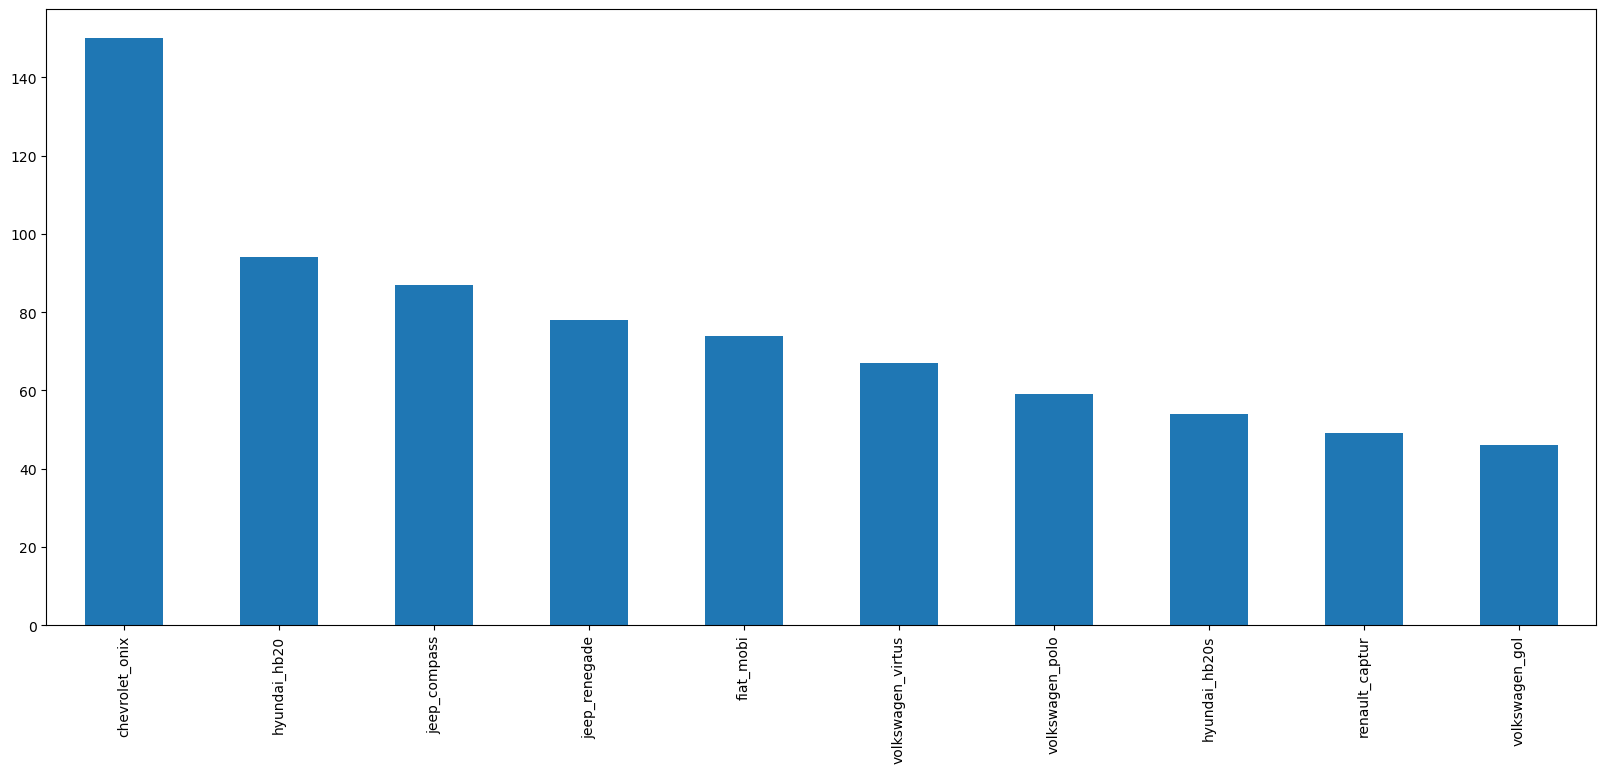

In [21]:
fig = plt.figure(figsize=(20, 8))
# top 10 of the most frequency cars
cars_df["car_name"].value_counts()[:10].plot(kind="bar")

plt.show()

In [22]:
cars_df.describe()

,km_traveled,value
count,1801.000000,1801.000000
mean,55.097640,86.141610
std,32.971565,33.402551
min,1.217000,33.770000
25%,38.378000,58.180000
50%,52.948000,81.970000
75%,71.377000,102.470000
max,866.000000,298.970000


In [23]:
cars_df.shape

(1801, 5)

In [24]:
cars_df.loc[cars_df["value"] == 298.970000]

,car_description,car_name,km_traveled,value,year
1151,3.0_24v_turbo_m_sport_automatico,bmw_540i,72.407,298.97,2018


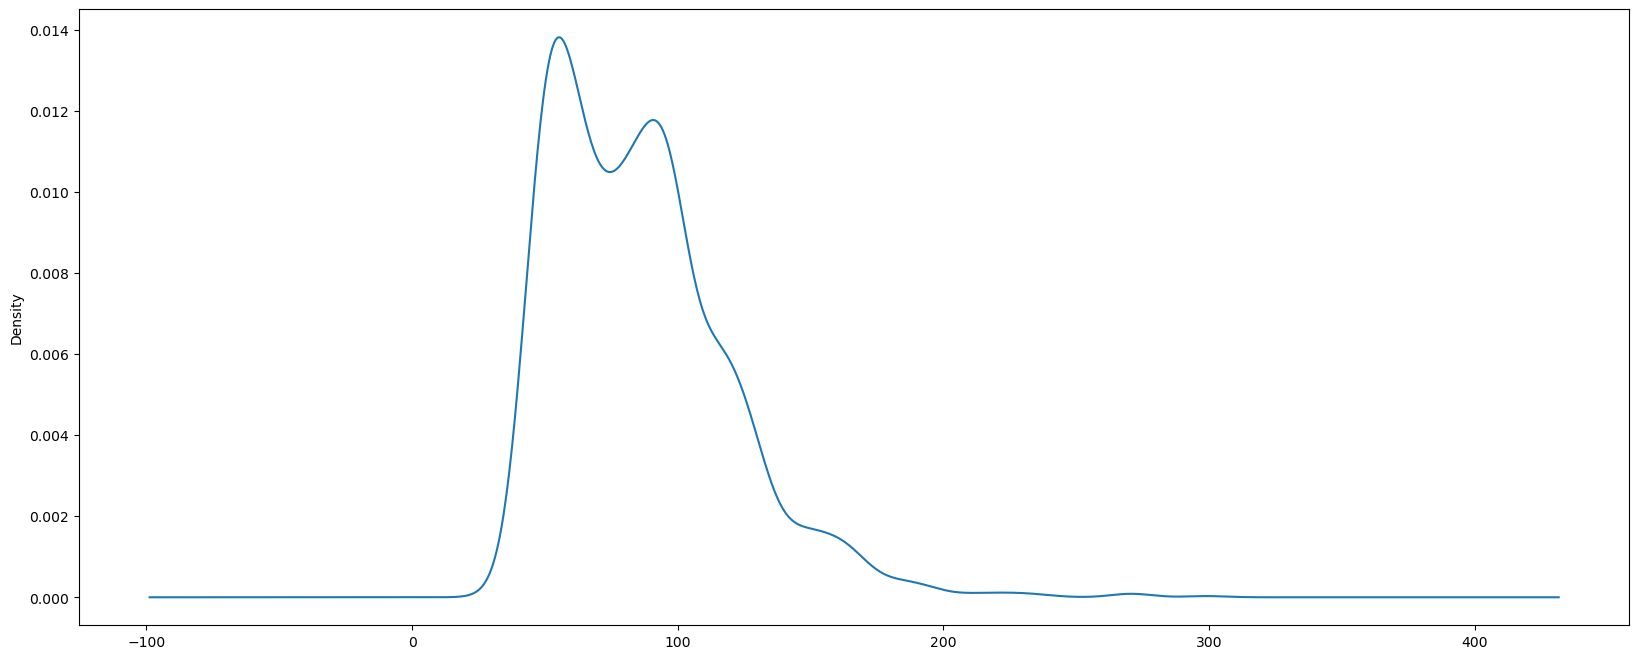

In [25]:
# cars values distribution
fig = plt.figure(figsize=(20, 8))

pd.Series(cars_df["value"].values).plot.kde()

plt.show()

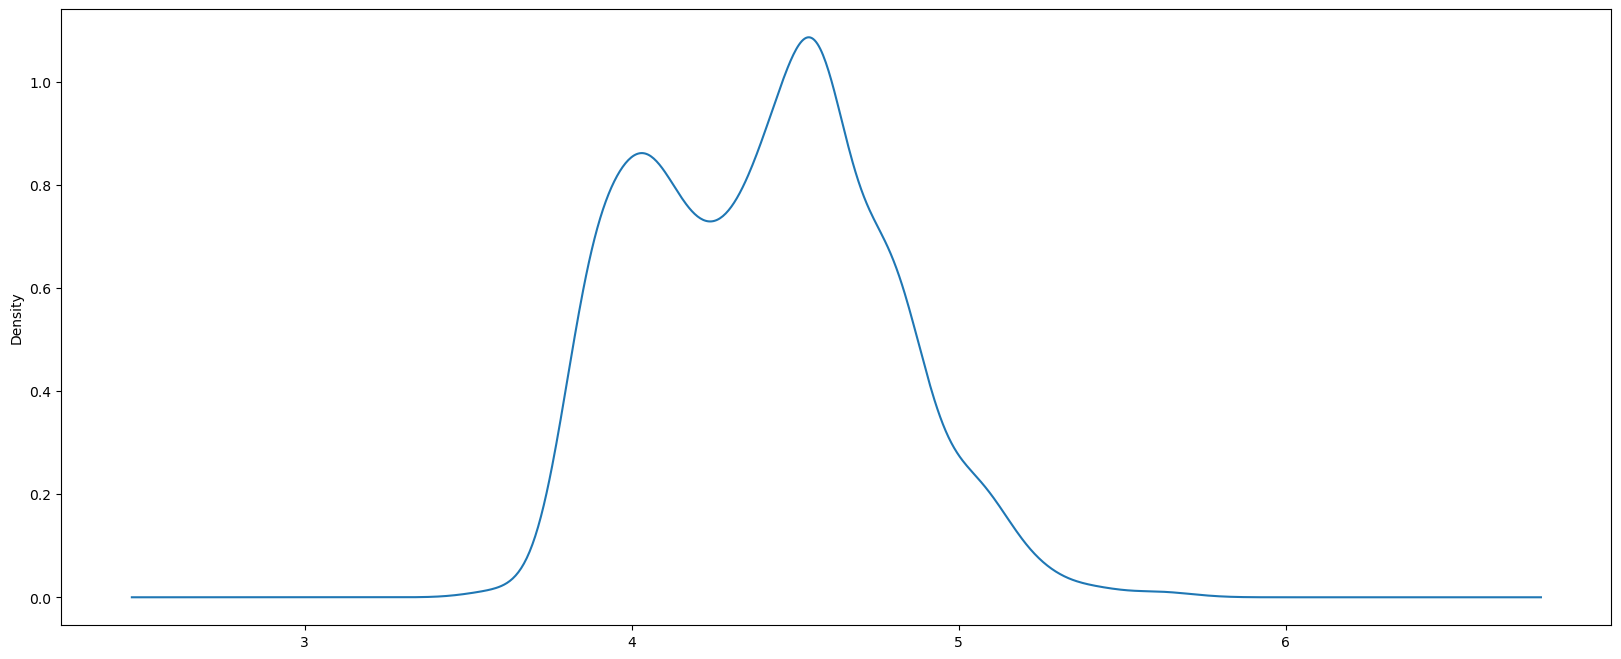

In [26]:
import numpy as np

# cars log(values) distribution
fig = plt.figure(figsize=(20, 8))

pd.Series(np.log1p(cars_df["value"]).values).plot.kde()

plt.show()

In [27]:
cars_df["value"] = np.log1p(cars_df["value"])

## Feature engineering

In [28]:
cars_df.head()

,car_description,car_name,km_traveled,value,year
0,1.6_16v_advance_xtronic,nissan_versa,6.214,4.690155,2022
1,2.0_lx_4x2_16v_automatico,honda_crv,102.064,4.355041,2012
2,1.8_gli_16v_automatico,toyota_corolla,35.990,4.634438,2019
3,1.6_freestyle_16v_powershift,ford_ecosport,51.683,4.288677,2017
4,1.6_16v_flexstart_s_xtronic,nissan_kicks,41.417,4.476996,2018


In [29]:
cars_df["car_description"].value_counts()

1.0_mpfi_joy_8v_manual                    78
1.0_evo_like._manual                      67
2.0_16v_longitude_automatico              60
1.0_200_tsi_comfortline_automatico        43
1.0_fire_attractive_manual                41
                                          ..
1.6_sport_turbo_automatico                 1
1.6_thp_shine_eat6                         1
1.6_titanium_hatch_16v_powershift          1
1.6_titanium_plus_sedan_16v_powershift     1
3.6_rt_v6_automatico                       1
Name: car_description, Length: 427, dtype: int64

In [30]:
car_description_lst = cars_df["car_description"].str.split("_")\
                                                .to_list()
car_desc = []
for item in car_description_lst:
    car_desc.append(item[-1])
    
cars_df["car_desc"] = car_desc

cars_df.head()

,car_description,car_name,km_traveled,value,year,car_desc
0,1.6_16v_advance_xtronic,nissan_versa,6.214,4.690155,2022,xtronic
1,2.0_lx_4x2_16v_automatico,honda_crv,102.064,4.355041,2012,automatico
2,1.8_gli_16v_automatico,toyota_corolla,35.990,4.634438,2019,automatico
3,1.6_freestyle_16v_powershift,ford_ecosport,51.683,4.288677,2017,powershift
4,1.6_16v_flexstart_s_xtronic,nissan_kicks,41.417,4.476996,2018,xtronic


In [31]:
cars_df2 = cars_df.copy()
cars_df2 = cars_df2.drop(labels=["car_description"], axis=1)

cars_df2.head()

,car_name,km_traveled,value,year,car_desc
0,nissan_versa,6.214,4.690155,2022,xtronic
1,honda_crv,102.064,4.355041,2012,automatico
2,toyota_corolla,35.990,4.634438,2019,automatico
3,ford_ecosport,51.683,4.288677,2017,powershift
4,nissan_kicks,41.417,4.476996,2018,xtronic


In [32]:
cars_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   car_name     1801 non-null   category
 1   km_traveled  1801 non-null   float64 
 2   value        1801 non-null   float64 
 3   year         1801 non-null   category
 4   car_desc     1801 non-null   object  
dtypes: category(2), float64(2), object(1)
memory usage: 51.3+ KB


## Model

### Choosing the model

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
full_train_df, test_df = train_test_split(cars_df2, test_size=0.2, random_state=15)

In [35]:
full_train_df.shape, test_df.shape

((1440, 5), (361, 5))

In [36]:
train_df, val_df = train_test_split(full_train_df, test_size=0.25, random_state=15)

In [37]:
train_df.shape, val_df.shape

((1080, 5), (360, 5))

In [38]:
y_train = train_df["value"].values
y_val = val_df["value"].values
y_test = test_df["value"].values

del train_df["value"]
del val_df["value"]
del test_df["value"]

In [39]:
train_df = train_df.reset_index(drop=True) 
val_df = val_df.reset_index(drop=True) 
test_df = test_df.reset_index(drop=True)

In [40]:
train_df.head()

,car_name,km_traveled,year,car_desc
0,volkswagen_amarok,87.918,2018,manual
1,volkswagen_golf,37.487,2017,tiptronic
2,renault_captur,24.609,2021,automatico
3,volkswagen_tiguan,54.101,2017,tiptronic
4,chevrolet_onix,42.300,2020,automatico


In [41]:
train_dict = train_df.to_dict(orient="records")
val_dict = val_df.to_dict(orient="records")
test_dict = test_df.to_dict(orient="records")

In [42]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dict)

X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [43]:
X_train.shape, X_val.shape, X_test.shape

((1080, 143), (360, 143), (361, 143))

In [44]:
X_train

array([[   0.   ,    0.   ,    0.   , ...,    0.   ,   87.918, 2018.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,   37.487, 2017.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,   24.609, 2021.   ],
       ...,
       [   0.   ,    0.   ,    0.   , ...,    0.   ,   29.468, 2020.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,   93.07 , 2019.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,   51.172, 2017.   ]])

#### Linear Regression (Base model)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error

def rmse(X, y, model):
    return np.sqrt(mean_squared_error(model.predict(X), y))

lr_rmse_train = rmse(X_train, y_train, lr)
lr_rmse_train

0.0759671479166581

In [52]:
lr_rmse_val = rmse(X_val, y_val, lr)
lr_rmse_val

138117067.008084

#### Decision Tree Regressor

Some parameters to tune:

    max_depth: The maximum depth of the tree.
    
    min_samples_split: The minimum number of samples required to split an internal node.
    
    min_samples_leaf: The minimum number of samples required to be at a leaf node.
        
    max_features: The number of features to consider when looking for the best split.

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTreeRegressor?

In [53]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
dtr_rmse_train = rmse(X_train, y_train, dtr)
dtr_rmse_train

1.4428153997190905e-16

In [55]:
dtr_rmse_val = rmse(X_val, y_val, dtr)
dtr_rmse_val

0.15983719524659892

In [59]:
# overfiting
dtr_rmse_val / dtr_rmse_train

1107814591372662.6

In [77]:
scores = []

for max_depth in [1, 2, 3, 4, 5, 6, 7, 10, 15, 20, 100, 120, 150]:
    dtr = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
    dtr.fit(X_train, y_train)
    
    dtr_rmse_train = rmse(X_train, y_train, dtr)
    dtr_rmse_val = rmse(X_val, y_val, dtr)
    
    scores.append((max_depth, dtr_rmse_train, dtr_rmse_val, dtr_rmse_val / dtr_rmse_train))
    # print(f"max_depth = {max_depth}")
    # print(f"Train error: {dtr_rmse_train}")
    # print(f"Validation error: {dtr_rmse_val}")
    # print(f"Val Train Rate: {dtr_rmse_val / dtr_rmse_train}")
    # print()
    
scores_df = pd.DataFrame(scores, 
                         columns=["max_depth",
                                  "dtr_rmse_train",
                                  "dtr_rmse_val",
                                  "val_train_rate"])

In [78]:
scores_df

,max_depth,dtr_rmse_train,dtr_rmse_val,val_train_rate
0,1,2.361471e-01,0.225862,9.564467e-01
1,2,2.257622e-01,0.213662,9.464037e-01
2,3,2.141200e-01,0.207075,9.670967e-01
3,4,2.045405e-01,0.202993,9.924327e-01
4,5,1.967407e-01,0.194395,9.880796e-01
5,6,1.889434e-01,0.193153,1.022281e+00
6,7,1.824058e-01,0.190606,1.044954e+00
7,10,1.643728e-01,0.196658,1.196415e+00
8,15,1.323442e-01,0.186128,1.406395e+00
9,20,1.012970e-01,0.177742,1.754666e+00


In [79]:
# max_depth options
max_depth_lst = list(scores_df.iloc[5:10]["max_depth"])
max_depth_lst

[6, 7, 10, 15, 20]

In [80]:
scores = []

for max_depth in max_depth_lst:
    for min_samples_leaf in [1, 2, 4, 5, 8, 9, 10, 20, 100, 150, 200]:
        dtr = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1)
        dtr.fit(X_train, y_train)

        dtr_rmse_train = rmse(X_train, y_train, dtr)
        dtr_rmse_val = rmse(X_val, y_val, dtr)

        scores.append((max_depth, min_samples_leaf, dtr_rmse_train, dtr_rmse_val, dtr_rmse_val / dtr_rmse_train))

scores_df = pd.DataFrame(scores, 
                     columns=["max_depth",
                              "min_samples_leaf",
                              "dtr_rmse_train",
                              "dtr_rmse_val",
                              "val_train_rate"])

In [81]:
scores_df

,max_depth,min_samples_leaf,dtr_rmse_train,dtr_rmse_val,val_train_rate
0,6,1,0.188943,0.193153,1.022281
1,6,2,0.190291,0.193318,1.015907
2,6,4,0.197111,0.190705,0.967499
3,6,5,0.199281,0.190083,0.953842
4,6,8,0.201816,0.204480,1.013200
5,6,9,0.202182,0.200880,0.993558
6,6,10,0.204906,0.197750,0.965076
7,6,20,0.208029,0.200727,0.964897
8,6,100,0.224994,0.215695,0.958666
9,6,150,0.227840,0.218205,0.957710


In [82]:
scores_df.loc[(scores_df["val_train_rate"] > 0.98) & (scores_df["val_train_rate"] < 1.01)]

,max_depth,min_samples_leaf,dtr_rmse_train,dtr_rmse_val,val_train_rate
5,6,9,0.202182,0.200880,0.993558
13,7,4,0.192001,0.189371,0.986302
16,7,9,0.199147,0.200246,1.005523
28,10,10,0.194444,0.195027,1.002997
29,10,20,0.200293,0.201070,1.003882


In [86]:
max_depth, min_samples_leaf = 10, 10
dtr = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1)
dtr.fit(X_train, y_train)

dtr_rmse_val = rmse(X_val, y_val, dtr)
dtr_rmse_val

0.19502682470253496

#### Random Forest Regressor

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rmse(X_train, y_train, rfr), rmse(X_val, y_val, rfr), rmse(X_val, y_val, rfr) / rmse(X_train, y_train, rfr)

(0.05643976281393369, 0.14033032612311006, 2.4863734205570704)

In [154]:
scores = []

for n_estimators in [1, 2, 3, 4, 5, 10, 20, 35, 50, 80, 90, 100, 150, 200]:
    rfr = RandomForestRegressor(n_estimators=n_estimators)
    rfr.fit(X_train, y_train)
    
    train_rmse = rmse(X_train, y_train, rfr)
    val_rmse = rmse(X_val, y_val, rfr)
    val_train_rate = val_rmse / train_rmse
    
    scores.append((n_estimators, train_rmse, val_rmse, val_train_rate))
    
rfr_scores_df = pd.DataFrame(scores, 
                             columns=["n_estimators", "train_rmse", "val_rmse", "val_train_rate"])

In [155]:
rfr_scores_df

,n_estimators,train_rmse,val_rmse,val_train_rate
0,1,0.117531,0.171924,1.462793
1,2,0.081786,0.155508,1.901401
2,3,0.081143,0.146248,1.802349
3,4,0.083250,0.154905,1.860723
4,5,0.072423,0.152664,2.107937
5,10,0.066346,0.143737,2.166495
6,20,0.056188,0.143075,2.546386
7,35,0.057298,0.137882,2.406376
8,50,0.056739,0.140643,2.478763
9,80,0.054921,0.137117,2.496625


In [158]:
scores = []

for depth in [2, 3, 4, 7, 8, 10, 15, 20, 50, 75]:
    rfr = RandomForestRegressor(n_estimators=3, 
                               max_depth=depth)
    rfr.fit(X_train, y_train)
    
    train_rmse = rmse(X_train, y_train, rfr)
    val_rmse = rmse(X_val, y_val, rfr)
    val_train_rate = val_rmse / train_rmse
    
    scores.append((depth, train_rmse, val_rmse, val_train_rate))
    
rfr_scores_df = pd.DataFrame(scores, 
                             columns=["depth", "train_rmse", "val_rmse", "val_train_rate"])

In [159]:
rfr_scores_df

,depth,train_rmse,val_rmse,val_train_rate
0,2,0.223302,0.215997,0.967284
1,3,0.212662,0.209856,0.986807
2,4,0.203310,0.204887,1.007758
3,7,0.178711,0.189033,1.057762
4,8,0.180639,0.191322,1.059139
5,10,0.154121,0.177675,1.152829
6,15,0.140279,0.173256,1.235081
7,20,0.118622,0.172656,1.455516
8,50,0.080004,0.153475,1.918349
9,75,0.084059,0.149893,1.783196


In [160]:
scores = []

for min_samples_leaf in range(1, 20):
    rfr = RandomForestRegressor(n_estimators=3, 
                               max_depth=20, 
                               min_samples_leaf=min_samples_leaf)
    rfr.fit(X_train, y_train)
    
    train_rmse = rmse(X_train, y_train, rfr)
    val_rmse = rmse(X_val, y_val, rfr)
    val_train_rate = val_rmse / train_rmse
    
    scores.append((min_samples_leaf, train_rmse, val_rmse, val_train_rate))
    
rfr_scores_df = pd.DataFrame(scores, 
                             columns=["min_samples_leaf", "train_rmse", "val_rmse", "val_train_rate"])

In [161]:
rfr_scores_df

,min_samples_leaf,train_rmse,val_rmse,val_train_rate
0,1,0.116605,0.176777,1.516035
1,2,0.137735,0.173348,1.258560
2,3,0.147769,0.181630,1.229149
3,4,0.160191,0.189394,1.182305
4,5,0.160158,0.196605,1.227566
5,6,0.173291,0.196380,1.133237
6,7,0.181013,0.205358,1.134494
7,8,0.187425,0.202617,1.081056
8,9,0.186907,0.202217,1.081909
9,10,0.194417,0.206205,1.060628


In [162]:
rfr = RandomForestRegressor(n_estimators=3, 
                           max_depth=20, 
                           min_samples_leaf=1)
rfr.fit(X_train, y_train)

rmse(X_val, y_val, rfr)

0.1644133186655801

#### Ridge Regressor

Linear least squares with l2 regularization.

Minimizes the objective function: $$||y - Xw||^2_2 + alpha * ||w||^2_2$$

Note: This estimator has built-in support for multi-variate regression.

Some parameters to tune:

    alpha: Constant that multiplies the L2 term, controlling regularization strength.
    
    fit_intercept: Whether to fit the intercept for this model. If set to false, no intercept will be used in calculations
    
    max_iter
    
    tol

In [87]:
from sklearn.linear_model import Ridge

In [89]:
ridge = Ridge()
ridge.fit(X_train, y_train)

ridge_rmse_val = rmse(X_val, y_val, ridge)
ridge_rmse_val

0.11694090789472185

In [90]:
ridge_rmse_train = rmse(X_train, y_train, ridge)
ridge_rmse_train

0.09429784122348367

In [91]:
ridge_rmse_val / ridge_rmse_train

1.2401228530521144

In [ ]:
np.linspace?

In [104]:
scores = []

for alpha in np.linspace(0.000001, 10, num=100):
    ridge = Ridge(alpha=alpha, random_state=1)
    ridge.fit(X_train, y_train)
    
    ridge_rmse_train = rmse(X_train, y_train, ridge)
    ridge_rmse_val = rmse(X_val, y_val, ridge)
    val_train_rate = ridge_rmse_val / ridge_rmse_train
    
    scores.append((alpha, ridge_rmse_train, ridge_rmse_val, val_train_rate))
    
scores_df = pd.DataFrame(scores, 
                         columns=["alpha", "ridge_rmse_train", "ridge_rmse_val", "val_train_rate"])

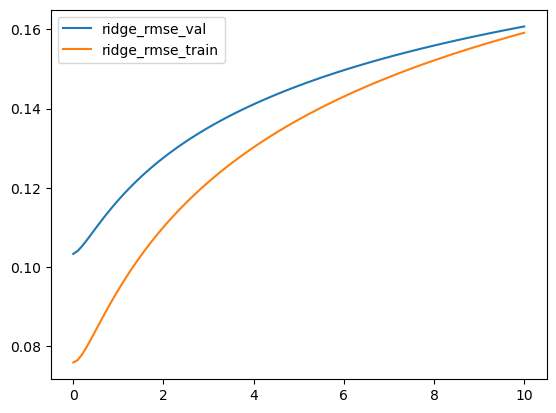

In [105]:
plt.plot(scores_df.alpha, scores_df.ridge_rmse_val, label="ridge_rmse_val")
plt.plot(scores_df.alpha, scores_df.ridge_rmse_train, label="ridge_rmse_train")

plt.legend()
plt.show()

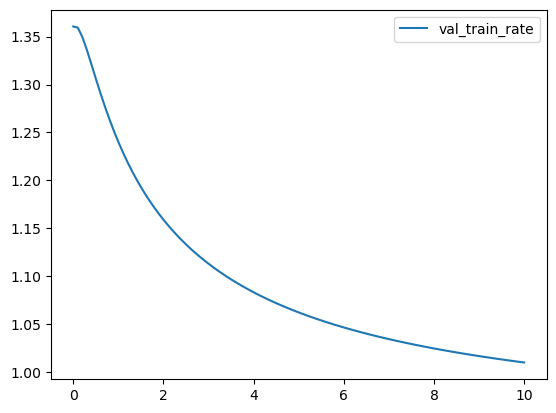

In [106]:
plt.plot(scores_df.alpha, scores_df.val_train_rate, label="val_train_rate")

plt.legend()
plt.show()

In [109]:
scores_df.head(30)

,alpha,ridge_rmse_train,ridge_rmse_val,val_train_rate
0,0.000001,0.075967,0.103358,1.360567
1,0.101011,0.076617,0.104148,1.359319
2,0.202021,0.078101,0.105406,1.349606
3,0.303031,0.079994,0.106867,1.335946
4,0.404041,0.082074,0.108403,1.320794
5,0.505051,0.084223,0.109948,1.305437
6,0.606062,0.086374,0.111468,1.290520
7,0.707072,0.088492,0.112946,1.276344
8,0.808082,0.090556,0.114374,1.263027
9,0.909092,0.092556,0.115749,1.250588


In [111]:
alpha = 1.919193

ridge = Ridge(alpha=alpha, random_state=1)
ridge.fit(X_train, y_train)

ridge_rmse_val = rmse(X_val, y_val, ridge)
ridge_rmse_val

0.1268945462508612

#### [XGBoost Regressor](https://machinelearningmastery.com/xgboost-for-regression/)

Some parameters to tune: 


    n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
    
    max_depth: The maximum depth of each tree, often values are between 1 and 10.
    
    eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
    
    subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
    
    colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

In [ ]:
#!pip install xgboost

In [118]:
import xgboost as xgb
from xgboost import XGBRegressor

print(xgboost.__version__)

1.6.2


In [125]:
XGBRegressor?

Init signature:
XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid valu

In [130]:
scores_boost = [] 

for n_estimators in [2, 4, 5, 7, 9, 20, 50, 100, 125, 200]:
    xgbr = XGBRegressor(n_estimators=n_estimators)
    xgbr = xgbr.fit(X_train, y_train)

    xgbr_rmse_train = rmse(X_train, y_train, xgbr)
    xgbr_rmse_val = rmse(X_val, y_val, xgbr)
    rate = xgbr_rmse_val / xgbr_rmse_train
    
    scores_boost.append((n_estimators, xgbr_rmse_train, xgbr_rmse_val, rate))

boost_scores_df = pd.DataFrame(scores_boost, 
                              columns=["n_estimators", "xgbr_rmse_train", "xgbr_rmse_val", "val_train_rate"])

In [131]:
boost_scores_df

,n_estimators,xgbr_rmse_train,xgbr_rmse_val,val_train_rate
0,2,1.939594,1.912369,0.985964
1,4,0.972426,0.952074,0.979071
2,5,0.698035,0.679402,0.973307
3,7,0.381957,0.368682,0.965244
4,9,0.244518,0.238228,0.974273
5,20,0.143671,0.162589,1.131674
6,50,0.098601,0.133525,1.354200
7,100,0.065468,0.119134,1.819726
8,125,0.055936,0.117794,2.105879
9,200,0.038527,0.113286,2.940439


In [134]:
n_estimators_lst = list(boost_scores_df["n_estimators"].iloc[4:9])
n_estimators_lst

[9, 20, 50, 100, 125]

In [135]:
scores_boost = [] 

for n_estimators in n_estimators_lst:
    for max_depth in range(1, 11):
        xgbr = XGBRegressor(n_estimators=n_estimators, 
                           max_depth=max_depth)
        xgbr = xgbr.fit(X_train, y_train)

        xgbr_rmse_train = rmse(X_train, y_train, xgbr)
        xgbr_rmse_val = rmse(X_val, y_val, xgbr)
        rate = xgbr_rmse_val / xgbr_rmse_train

        scores_boost.append((n_estimators, max_depth, xgbr_rmse_train, xgbr_rmse_val, rate))

boost_scores_df = pd.DataFrame(scores_boost, 
                              columns=["n_estimators", "max_depth", "xgbr_rmse_train", "xgbr_rmse_val",
                                       "val_train_rate"])

In [136]:
boost_scores_df

,n_estimators,max_depth,xgbr_rmse_train,xgbr_rmse_val,val_train_rate
0,9,1,0.279225,0.258368,0.925302
1,9,2,0.265697,0.248480,0.935200
2,9,3,0.259356,0.246762,0.951442
3,9,4,0.252180,0.244120,0.968037
4,9,5,0.247818,0.240453,0.970283
5,9,6,0.244518,0.238228,0.974273
6,9,7,0.241296,0.234637,0.972404
7,9,8,0.236715,0.234729,0.991608
8,9,9,0.233392,0.231762,0.993018
9,9,10,0.231016,0.228373,0.988558


In [137]:
boost_scores_df.loc[boost_scores_df["n_estimators"] == 20]

,n_estimators,max_depth,xgbr_rmse_train,xgbr_rmse_val,val_train_rate
10,20,1,0.212708,0.204782,0.962737
11,20,2,0.188944,0.188696,0.998686
12,20,3,0.175657,0.179986,1.024644
13,20,4,0.162661,0.173498,1.066622
14,20,5,0.152155,0.167766,1.102594
15,20,6,0.143671,0.162589,1.131674
16,20,7,0.135893,0.159867,1.176425
17,20,8,0.129450,0.156265,1.207147
18,20,9,0.120816,0.150941,1.249347
19,20,10,0.113727,0.150416,1.322599


In [138]:
n_estimators, max_depth = 20, 10

In [141]:
scores_boost = [] 

for eta in np.linspace(0.01, 0.8, num=100):
        xgbr = XGBRegressor(n_estimators=n_estimators, 
                           max_depth=max_depth, 
                           eta=eta)
        xgbr = xgbr.fit(X_train, y_train)

        xgbr_rmse_train = rmse(X_train, y_train, xgbr)
        xgbr_rmse_val = rmse(X_val, y_val, xgbr)
        rate = xgbr_rmse_val / xgbr_rmse_train

        scores_boost.append((eta, xgbr_rmse_train, xgbr_rmse_val, rate))

boost_scores_df = pd.DataFrame(scores_boost, 
                              columns=["eta", "xgbr_rmse_train", "xgbr_rmse_val",
                                       "val_train_rate"])

In [146]:
boost_scores_df.sort_values(by=["xgbr_rmse_val", "val_train_rate"], ascending=True).head(30)

,eta,xgbr_rmse_train,xgbr_rmse_val,val_train_rate
89,0.720202,0.063225,0.123392,1.951621
93,0.752121,0.063402,0.124086,1.957145
78,0.632424,0.072154,0.124333,1.723166
87,0.704242,0.065854,0.124834,1.895635
88,0.712222,0.064915,0.125114,1.927358
90,0.728182,0.065002,0.125873,1.936453
95,0.768081,0.053707,0.125887,2.343937
72,0.584545,0.075017,0.126223,1.682589
81,0.656364,0.069353,0.126228,1.820082
84,0.680303,0.066741,0.126361,1.893317


In [148]:
n_estimators, max_depth, eta = 20, 10, 0.504747

xgbr = XGBRegressor(n_estimators=n_estimators, 
                   max_depth=max_depth, 
                   eta=eta)
xgbr = xgbr.fit(X_train, y_train)

xgbr_rmse_val = rmse(X_val, y_val, xgbr)
xgbr_rmse_val

0.1280569829807533

#### Other types of regressor to study

* Bayesian linear regression

* Polynomial Regression

* Lasso Regression

### Model selected: Ridge

In [163]:
# DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=1)
dtr.fit(X_train, y_train)

rmse(X_val, y_val, dtr)

0.19502682470253496

In [164]:
# RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=3, 
                           max_depth=20, 
                           min_samples_leaf=1)
rfr.fit(X_train, y_train)

rmse(X_val, y_val, rfr)

0.16490476727321488

In [165]:
# Ridge
ridge = Ridge(alpha=1.919193, random_state=1)
ridge.fit(X_train, y_train)

rmse(X_val, y_val, ridge)

0.1268945462508612

In [166]:
# XGBRegressor
xgbr = XGBRegressor(n_estimators=20, 
                   max_depth=10, 
                   eta=0.504747)
xgbr = xgbr.fit(X_train, y_train)

rmse(X_val, y_val, xgbr)

0.1280569829807533

#### Training the final model

In [168]:
full_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 1653 to 1480
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   car_name     1440 non-null   category
 1   km_traveled  1440 non-null   float64 
 2   value        1440 non-null   float64 
 3   year         1440 non-null   category
 4   car_desc     1440 non-null   object  
dtypes: category(2), float64(2), object(1)
memory usage: 53.3+ KB


In [179]:
full_train_df, test_df = train_test_split(cars_df2, test_size=0.2, random_state=15)

y_full_train = full_train_df["value"].values

del full_train_df["value"]

full_train_df = full_train_df.reset_index(drop=True) 
full_train_dict = full_train_df.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(full_train_dict)

y_test = test_df["value"].values

del test_df["value"]

X_test = dv.transform(test_df.reset_index(drop=True).to_dict(orient="records"))

In [180]:
X_full_train.shape, X_test.shape

((1440, 151), (361, 151))

In [182]:
# Ridge
ridge = Ridge(alpha=1.919193, random_state=1)
ridge.fit(X_full_train, y_full_train)

rmse(X_test, y_test, ridge)

0.10623746567310713

## Using the model

In [202]:
def pipeline(initial_df):
    """
    This function implements all data processing and feature engineering in order
    to return a final treated dataframe ready to be used as model input.
    
    Input: Dataframe (initial dataframe)
    
    Return: X (data to be used as input in our model)
    
    Example of the initial dataframe:
        car_description 	      car_name 	       km_traveled 	  year
    1.6 16v Advance Xtronic 	  Nissan Versa     6.214 	      2022
    2.0 Lx 4x2 16v Automático 	  Honda Crv 	   102.064        2012
    1.8 Gli 16v Automático 	      Toyota Corolla   35.990 	      2019
    1.6 Freestyle 16v Powershift  Ford Ecosport    51.683 	      2017
    1.6 16v Flexstart S Xtronic   Nissan Kicks 	   41.417 	      2018
    
    Type of each column of the initial dataframe:
        car_description: object
        car_name: object
        km_traveled: float64
        year: int64
    
    """
    
    cars_df = initial_df.copy()
    
    columns = ["car_description", "car_name"]
    for col in columns:
        cars_df[col] = cars_df[col].str.replace(" ", "_")\
                        .str.lower()\
                        .str.normalize('NFKD')\
                        .str.encode('ascii', errors='ignore')\
                        .str.decode('utf-8')
    
    cars_df["car_name"] = cars_df["car_name"].astype("category")
    cars_df["car_description"] = cars_df["car_description"].astype("category")
    cars_df["year"] = cars_df["year"].astype("category")
        
    car_description_lst = cars_df["car_description"].str.split("_")\
                                                .to_list()
    car_desc = []
    for item in car_description_lst:
        car_desc.append(item[-1])

    cars_df["car_desc"] = car_desc
    
    cars_df = cars_df.drop(labels=["car_description"], axis=1)
            
    X = dv.transform(cars_df.reset_index(drop=True).to_dict(orient="records"))
    
    return X

In [206]:
raw_data = [("1.6 16v Advance Xtronic", "Nissan Versa", 6.214, 2022),
           ("1.8 Gli 16v Automático", "Toyota Corolla", 35.990, 2019), 
           ("Freestyle 16v Powershift", "Ford Ecosport", 51.683, 2017)]
df = pd.DataFrame(raw_data, 
                 columns=["car_description", "car_name", "km_traveled", "year"])
X = pipeline(df)

In [207]:
def predict(X):
    y_pred = np.expm1(ridge.predict(X))
    
    return y_pred

In [208]:
y_predict = predict(X)
y_predict

array([113.78711813, 108.03057083,  71.22311848])